In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Stress.csv")

In [3]:
my_df = df[["label" , "confidence" , "social_timestamp"]]

In [4]:
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [5]:
df.tail()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143
2837,ptsd,5y25cl,"[0, 5]",I was talking to my mom this morning and she s...,1,0.571429,1488909516


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [7]:
df.describe()

,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


In [8]:
from matplotlib import pyplot as plt

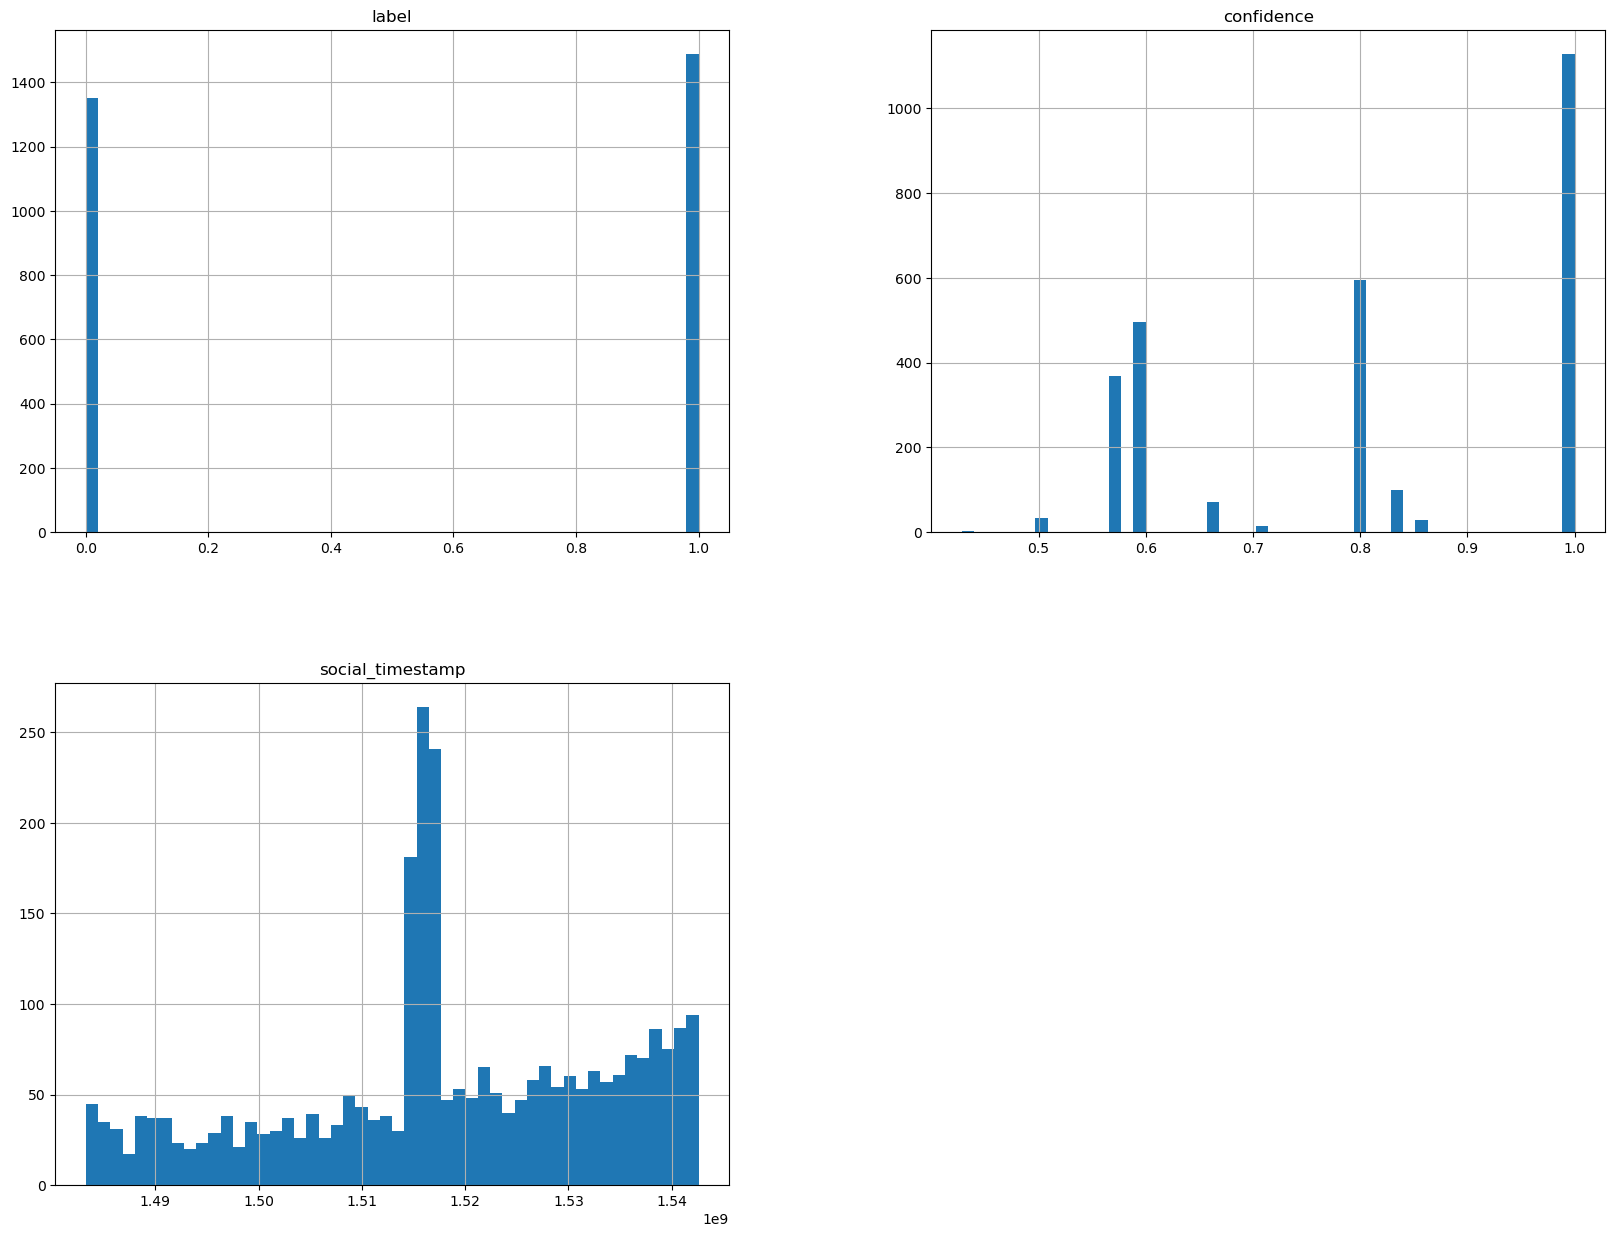

In [9]:
df.hist(bins= 50 , figsize= (20 , 15))
plt.show()

## split test data and train data

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
# 0 and 1 in "label" should be equally divided in train and test data

split = StratifiedShuffleSplit(n_splits= 1 , test_size= 0.2 , random_state= 42)

for train_index , test_index in split.split(my_df , my_df["label"]) :
    
    strat_train_set = my_df.loc[train_index]
    strat_test_set = my_df.loc[test_index]

In [12]:
strat_train_set["label"].value_counts()

label
1    1190
0    1080
Name: count, dtype: int64

In [13]:
strat_test_set["label"].value_counts()

label
1    298
0    270
Name: count, dtype: int64

In [14]:
my_df = strat_train_set.copy()

In [15]:
my_df.describe()

,label,confidence,social_timestamp
count,2270.000000,2270.000000,2.270000e+03
mean,0.524229,0.809125,1.518220e+09
std,0.499523,0.177613,1.543302e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.510211e+09
50%,1.000000,0.800000,1.517105e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542583e+09


## correlation

In [16]:
corr_matrix = my_df.corr()

corr_matrix["confidence"].sort_values(ascending= False)

confidence          1.000000
label               0.033344
social_timestamp    0.030826
Name: confidence, dtype: float64

In [17]:
df[["text" , "label"]]

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0
2834,I don't have the ability to cope with it anymo...,1
2835,In case this is the first time you're reading ...,0
2836,Do you find this normal? They have a good rela...,0


In [18]:
# for model

my_df = strat_train_set.drop("confidence" , axis = 1)
my_df_labels = strat_train_set["confidence"].copy()

## imputer

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imputer = SimpleImputer(strategy= "median")
imputer.fit(my_df)

SimpleImputer(strategy='median')

In [21]:
imputer.statistics_.shape

(2,)

In [22]:
x = imputer.transform(my_df)

In [23]:
my_df_tr = pd.DataFrame(x , columns= my_df.columns)

In [24]:
my_df_tr.describe()

,label,social_timestamp
count,2270.000000,2.270000e+03
mean,0.524229,1.518220e+09
std,0.499523,1.543302e+07
min,0.000000,1.483274e+09
25%,0.000000,1.510211e+09
50%,1.000000,1.517105e+09
75%,1.000000,1.530898e+09
max,1.000000,1.542583e+09


## pipeline

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [26]:
my_pipeline = Pipeline([
    ("imputer" , SimpleImputer(strategy= "median")),
    ("std_scaler" , StandardScaler())
])

In [27]:
my_df_num_tr = my_pipeline.fit_transform(my_df)

In [28]:
my_df_num_tr

array([[ 0.95266102,  1.03531018],
       [ 0.95266102,  1.39335381],
       [-1.04969131,  1.20349362],
       ...,
       [-1.04969131,  0.79962085],
       [-1.04969131, -0.96748949],
       [ 0.95266102,  1.48776406]])

## model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
import numpy as np

In [31]:
model = RandomForestRegressor()

In [32]:
model.fit(my_df_num_tr , my_df_labels)

RandomForestRegressor()

In [33]:
# take some data to analyze

some_data = my_df.iloc[:6]
some_labels = my_df_labels.iloc[:6]

In [34]:
prepared_data = my_pipeline.transform(some_data)

In [35]:
print(model.predict(prepared_data))

[0.68804762 0.94       0.806      0.79691735 0.684      0.75153175]


In [36]:
print(np.array(some_labels))

[0.6        1.         0.8        0.8        0.6        0.83333333]


In [37]:
# take full data after analyzing

some_data = my_df
some_labels = my_df_labels

In [38]:
prepared_data = my_pipeline.transform(some_data)

## evaluating the model

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
my_df_pred = model.predict(my_df_num_tr)

In [41]:
mse = mean_squared_error(my_df_labels , my_df_pred)
rmse = np.sqrt(mse)

In [42]:
print(rmse)

0.08629393617137852


## cross validation

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
scores = cross_val_score(model , my_df_num_tr , my_df_labels , scoring= "neg_mean_squared_error" , cv= 10)
rmse_scores = np.sqrt(-scores)

In [45]:
print(rmse_scores)

[0.20532041 0.20731716 0.20921842 0.21247969 0.21878701 0.20175289
 0.21283119 0.19319877 0.20326781 0.1941798 ]


In [46]:
def print_score(scores) :
    print(f"Score: {scores}")
    print(f"Mean : {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

In [47]:
print_score(rmse_scores)

Score: [0.20532041 0.20731716 0.20921842 0.21247969 0.21878701 0.20175289
 0.21283119 0.19319877 0.20326781 0.1941798 ]
Mean : 0.20583531581721976
Standard Deviation: 0.007704117994490492


## dump or save the model

In [48]:
from joblib import dump , load

In [49]:
dump(model , "StressConfidence.joblib")

['StressConfidence.joblib']

## testing the model on test data

In [50]:
x_test = strat_test_set.drop("confidence" , axis = 1)
y_test = strat_test_set["confidence"].copy()
x_test_pred = my_pipeline.transform(x_test)

In [51]:
final_pred = model.predict(x_test_pred)
final_mse = mean_squared_error(y_test , final_pred)
final_rmse = np.sqrt(final_mse)

In [52]:
print(final_rmse)

0.2031637764999628


In [53]:
prepared_data[6]

array([ 0.95266102, -1.3536602 ])

## using the model

In [54]:
from joblib import dump , load
import numpy as np

In [55]:
my_model = load("StressConfidence.joblib")

In [56]:
# predict the confidence based on lavel and social_timestamp
features = np.array([[0.95266102, -1.3536602]])
my_model.predict(features)

array([0.92771429])

In [57]:
print(f"so the confidence of particular feature is: {my_model.predict(features)}")

so the confidence of particular feature is: [0.92771429]
